In [14]:
%matplotlib inline

In [15]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits 
import scipy 
from scipy.signal import*

# smooth function with the average of 3 pixel

In [16]:
def smooth(fluxin,i): 
  m=len(fluxin)
  sub=np.zeros((i,m-i+1))
  fluxout=np.zeros(m) 

  for k in range(i):
   sub[k]=fluxin[k:m-i+k+1]
   if i/2>int(i/2):
    fluxout[int(i/2):m-int(i/2)]=np.sum(sub,axis=0)
    fluxout[0:int(i/2)]=fluxin[0:int(i/2)]
    fluxout[m-int(i/2):m]=fluxin[m-int(i/2):m]
   else
    fluxout[int(i/2):m-int(i/2)+1]=np.sum(sub,axis=0)
    fluxout[0:int(i/2)]=fluxin[0:int(i/2)]
    fluxout[m-int(i/2+1):m]=fluxin[m-int(i/2)]
  fluxout[]
  return fluxout

# output 100 spectrum

In [17]:
 k=1
 bal=pyfits.open("DR12_BAL.fits")
 baldata=bal[1].data
 wave=[]
 flux=[]
 ebar=[]
 wave=np.array(baldata[k][0][20:-20])
 flux=np.array(baldata[k][1][20:-20])
 ebar=np.array(baldata[k][2][20:-20])

# delete the data with wave=0

In [18]:
 b=[j for j,x in enumerate(wave) if x==0]
 wave=np.delete(wave,b)
 flux=np.delete(flux,b)
 ebar=np.delete(ebar,b)

# smooth data

In [19]:
#fluxhat= scipy.signal.savgol_filter(flux,3,1) #anothor way to smooth
fluxhat=smooth(flux,5)

# plot the graph

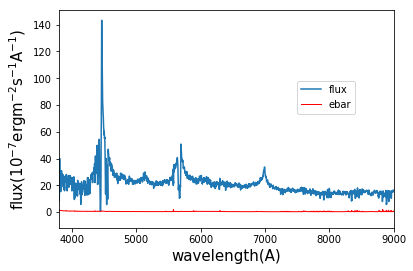

In [20]:
 plt.plot(wave,fluxhat,label='flux')
 plt.plot(wave,ebar,color='red',label='ebar',lw=1)
 plt.xlabel('wavelength(A)',fontsize=15)
 plt.ylabel(r'$\rm{flux(10^{-7}erg m^{-2} s^{-1} A^{-1})}$',fontsize=15)
 plt.xlim(3800,9000) 
 plt.legend(bbox_to_anchor=(0.9,0.7))
# plt.savefig(str(k),bbox_inches='tight',format='pdf')
# plt.close()
 plt.show()